<a href="https://colab.research.google.com/github/faznafathima/__PROJECTS__/blob/main/winequality_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/winequalityN.csv')
data

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     white            7.0             0.270  ...       0.45      8.8        6
1     white            6.3             0.300  ...       0.49      9.5        6
2     white            8.1             0.280  ...       0.44     10.1        6
3     white            7.2             0.230  ...       0.40      9.9        6
4     white            7.2             0.230  ...       0.40      9.9        6
...     ...            ...               ...  ...        ...      ...      ...
6492    red            6.2             0.600  ...       0.58     10.5        5
6493    red            5.9             0.550  ...        NaN     11.2        6
6494    red            6.3             0.510  ...       0.75     11.0        6
6495    red            5.9             0.645  ...       0.71     10.2        5
6496    red            6.0             0.310  ...       0.66     11.0        6

[6497 rows x 13 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
data.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    6487.000000       6489.000000  ...  6497.000000  6497.000000
mean        7.216579          0.339691  ...    10.491801     5.818378
std         1.296750          0.164649  ...     1.192712     0.873255
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]

In [ ]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
data.dropna(axis=0,inplace =True) 

In [ ]:
data.drop_duplicates(subset=None, inplace=True)

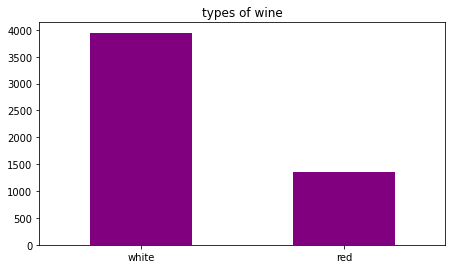

In [ ]:
plt.subplot(222)
data['type'].value_counts().plot(kind='bar', title='types of wine', figsize=(16,9),color ="purple")

plt.xticks(rotation=0)

plt.show()

white wine's count is a lot greater than red wine's count

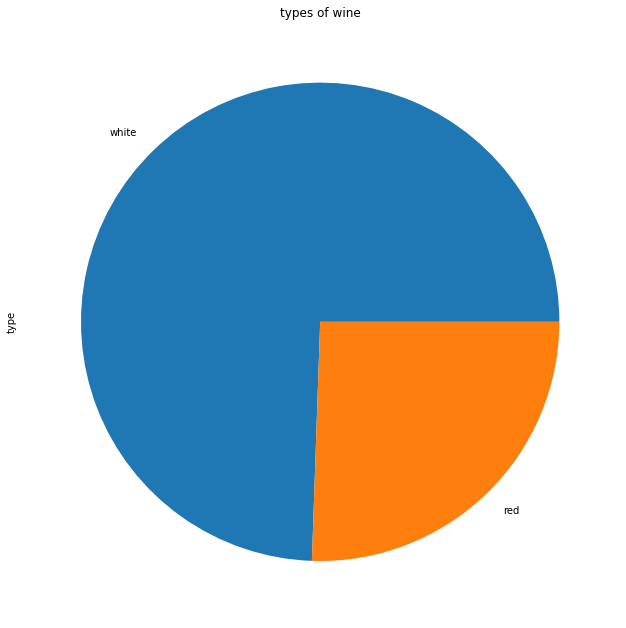

In [ ]:
labels=["white","red"]
data['type'].value_counts().plot(kind='pie', title='types of wine',labels=labels,figsize=(11,11))
plt.show()

red wine is only quarter of the total count

[]

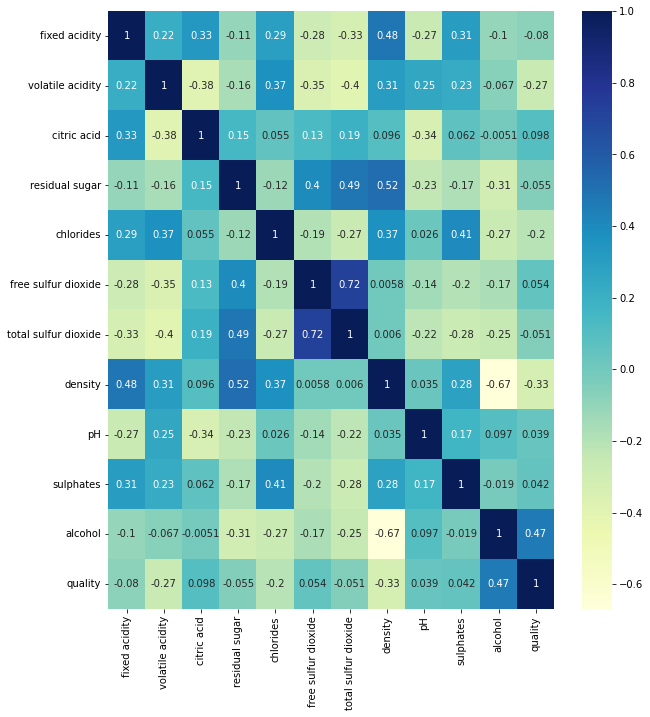

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.plot()

free sulfur dioxide and total sulfur dioxide have greater correlation.
residual sugar and density are positively correlated.
residual sugar and total sulfur dioxide are positively correlated.
density and fixed acidity are positively correlated.
quality and alcohol are positively correlated.
There is no correlation between free sulfur dioxide and density.
density and alcohol are negatively correlated.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


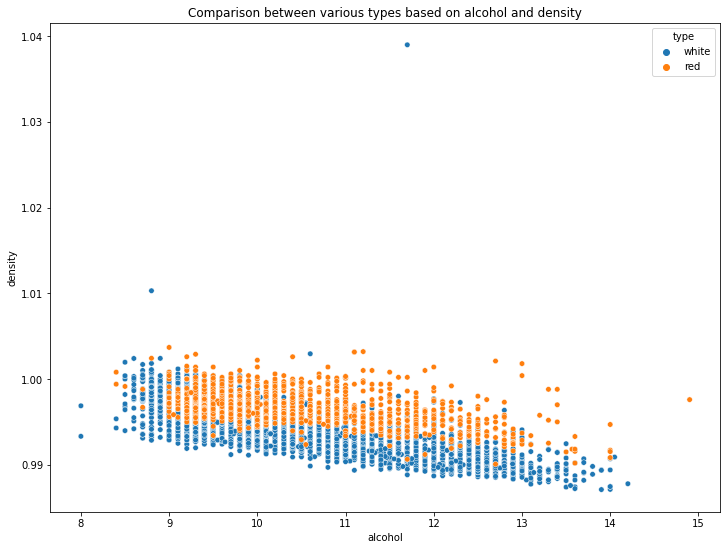

In [ ]:
plt.figure(figsize=(12,9))
plt.title("Comparison between various types based on alcohol and density")
sns.scatterplot(data["alcohol"],data["density"],hue =data["type"],s=30)
plt.show()

for both wines density decreases as alcohol increases

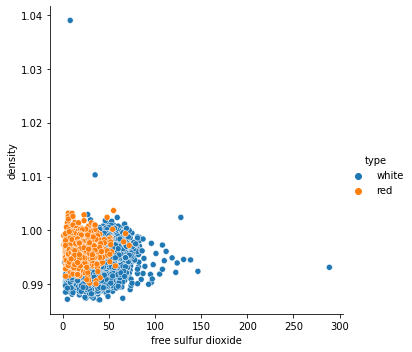

In [ ]:
sns.relplot(x='free sulfur dioxide', y='density', hue='type', data=data)
plt.show()

There is no big change in density as the free sulfur dioxide increases.

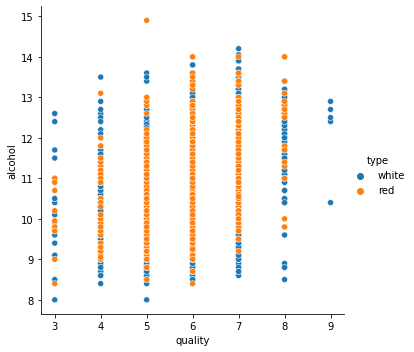

In [ ]:
sns.relplot(x='quality', y='alcohol', hue='type', data=data)
plt.show()

As the alcohol increases there is an increse in quality for both wines.

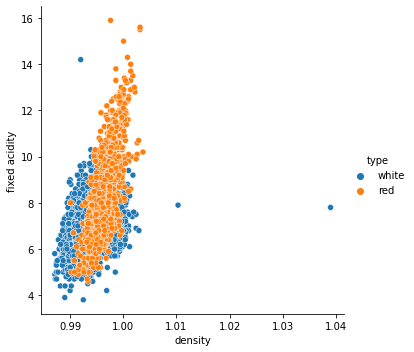

In [ ]:
sns.relplot(x='density', y='fixed acidity', hue='type', data=data)
plt.show()

as the fixed acidity increases the density also increases for both wines.

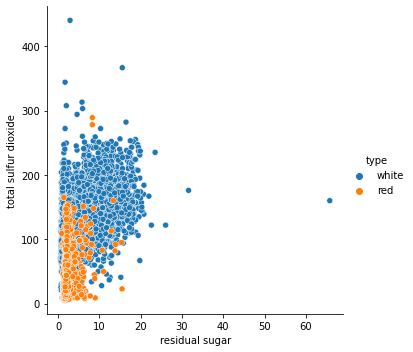

In [ ]:
sns.relplot(x='residual sugar', y='total sulfur dioxide', hue='type', data=data)
plt.show()

For white wine as the total sulfur dioxide increases there is little increase in residual sugar, but for red wine there is no much difference in residual sugar.

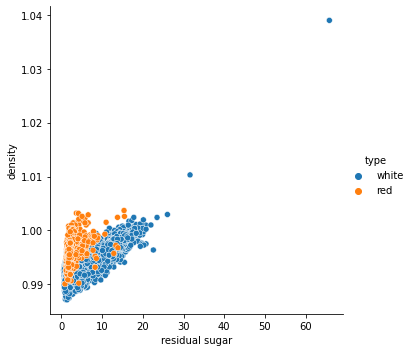

In [ ]:
sns.relplot(x='residual sugar', y='density', hue='type', data=data)
plt.show()

as the residual sugar incresases the density also increases for both wines.

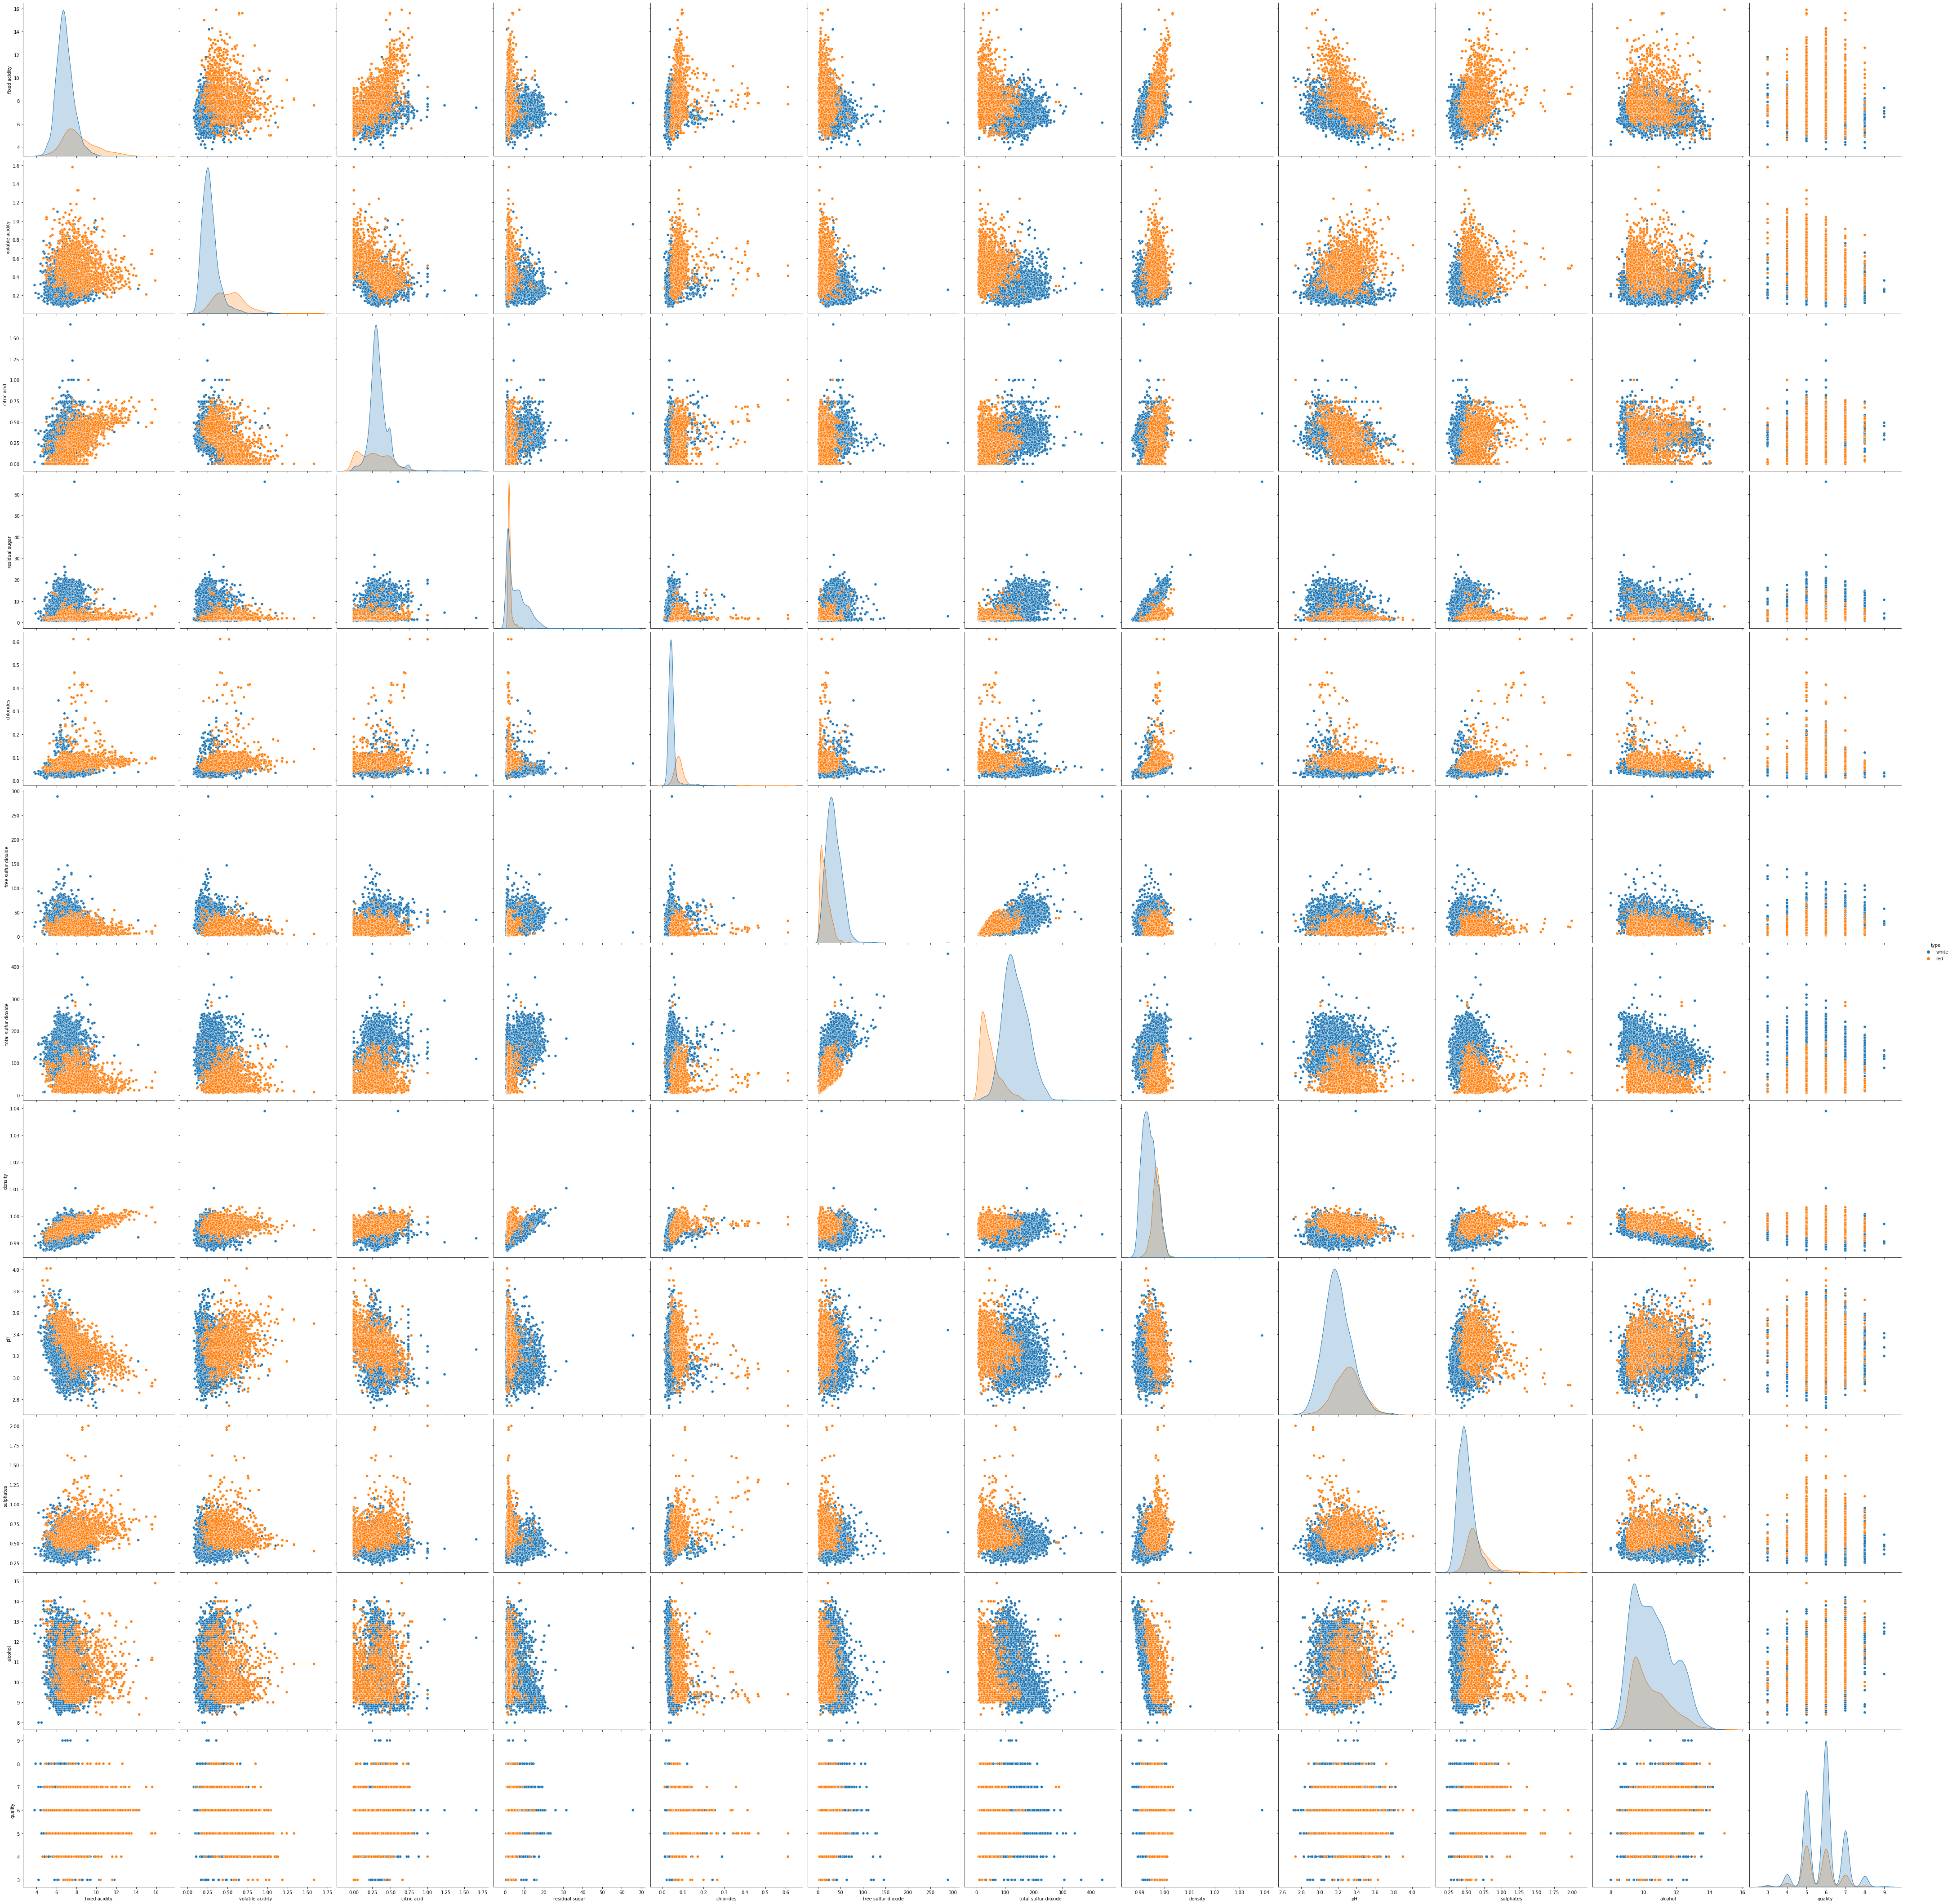

In [ ]:
sns.pairplot(data=data,hue="type",height=5)
plt.show()

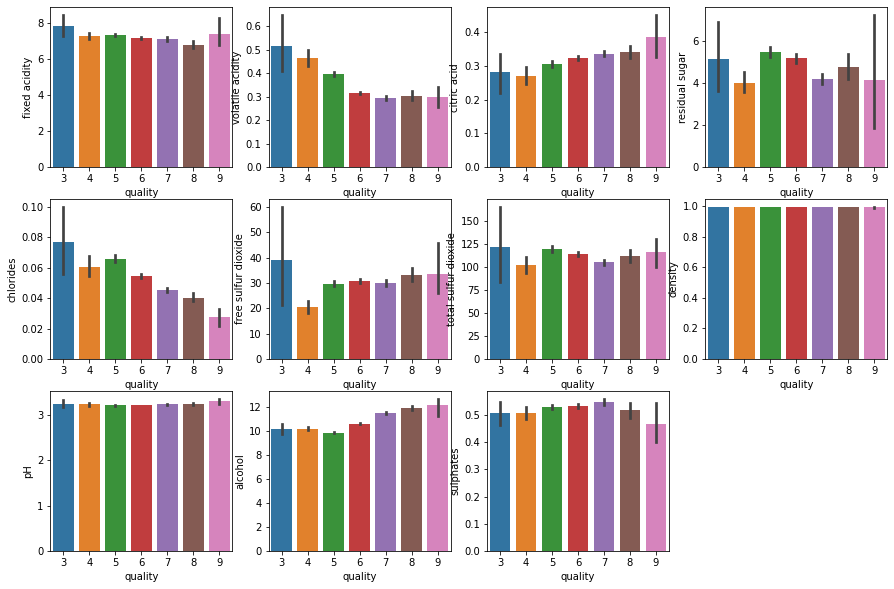

In [ ]:
f = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=data)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=data)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=data)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=data)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=data)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=data)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=data)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=data)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=data)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='alcohol',data=data)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='sulphates',data=data)
plt.show()

quality of the wine increases as the chloride and volatile acidity decreases.
But also quality of the wine increses as the alcohol and citric acid increases.

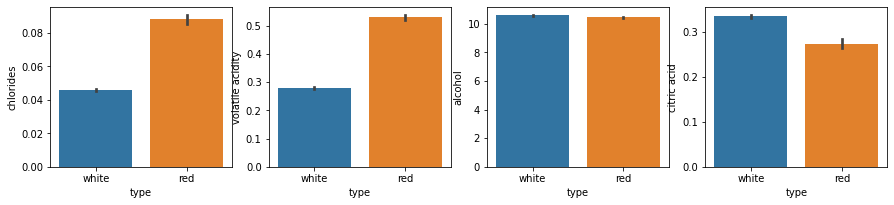

In [ ]:
f = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='type',y='chlorides',data=data)
plt.subplot(3,4,2)
sns.barplot(x='type',y='volatile acidity',data=data)
plt.subplot(3,4,3)
sns.barplot(x='type',y='alcohol',data=data)
plt.subplot(3,4,4)
sns.barplot(x='type',y='citric acid',data=data)
plt.show()

the chlorides and volatile acidty is lesser for white wine than red wine hence the quality of white wine will be greater.
alcohol is same for both wines.
the citric acid is greater in white wine which implies greater quality.
#### Hence we conclude that white wine have greater quality than red wine.